In [25]:
%matplotlib inline


In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [27]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [28]:
np.random.seed(sum(map(ord, "categorical")))

In [29]:
sf = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")

I am analyzing the SF crime statistics. First, I convert the time of day data to a numeric scale so it can be represented as a quantity on an axis. Second, I convert the day of the week column to a binary variable, weekend or weekday.

In [30]:
def time_convert(x):
    x = datetime.datetime.strptime(x, '%H:%M').time()
    return float(str(x.hour)+'.'+str(x.minute))

sf['Time'] = sf['Time'].apply(time_convert)


In [31]:
def weekend_convert(x):
    if x == 'Sunday':
        x = 'Weekend'
    elif x == 'Saturday':
        x = 'Weekend'
    else:
        x = 'Weekday'
    return x

sf['DayOfWeek'] = sf['DayOfWeek'].apply(weekend_convert)

Next, I create a simple bar graph showing the freqency of each crime type during the summer of 2014 in SF. Some of these crimes were very rare so I will not be analyzing them in the subsequent visualizations. I chose a subset of crimes to analyze based partially on frequency, partially on showcasing results that were interesting.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


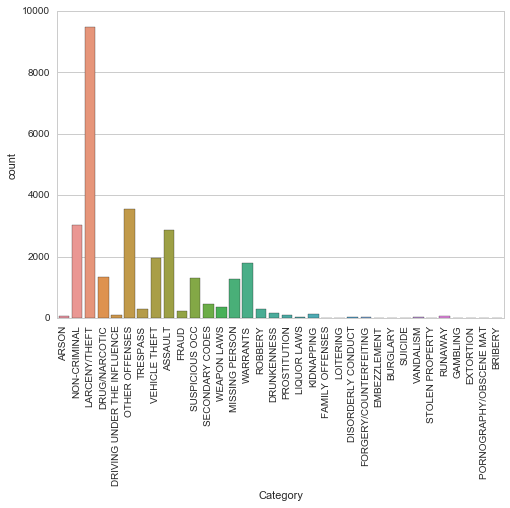

In [32]:
g=sns.countplot("Category", data=sf)

for item in g.get_xticklabels():
    item.set_rotation(90)

Larceny/Theft was the most frequently occuring crime category.

The plot below shows the time of day that each crime occured (where the horizontal axis represents the time on a 24 hour scale). You can see that some crimes seem more likely to occur at some times than others. For example, driving under the influence appears to happen more often in the evening and the very early hours of the morning. For this first graph I included all crimes, not just the aforementioned subset, to give a sense of the relative sparseness of some (like briberty or gambling).

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


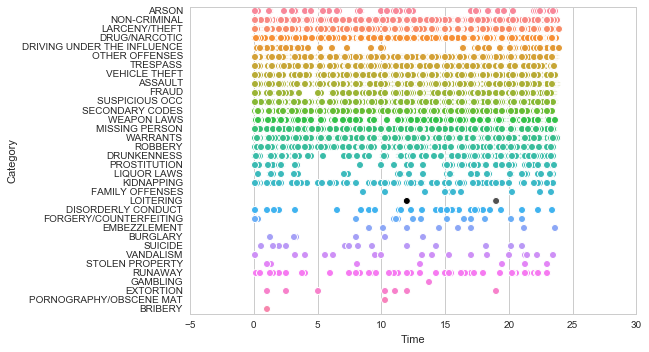

In [33]:
h=sns.stripplot(x="Time", y="Category",data=sf)

#g = sns.factorplot("Category","Time",data=sf)
#g.set_xticklabels(rotation=90)

Below is the subset of crimes I will be analysing further.

In [34]:
sf_robbery = sf[sf['Category'].isin(['ROBBERY','LARCENY/THEFT','VEHICLE THEFT','WEAPON LAWS','ASSAULT','DRUG/NARCOTIC','WARRANTS','FRAUD','PROSTITUTION','DRUNKENNESS','DRIVING UNDER THE INFLUENCE'])]

The graph below shows a rough sketch of the extrapolated density distribution for selected crimes. You can see where the parts of the graphical representation get fatter - this means that the particular crime tended to happen more often at that time.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


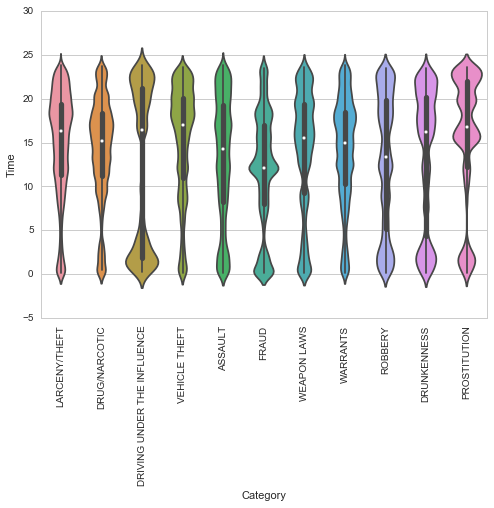

In [35]:
g=sns.violinplot(x="Category", y="Time",bw=.1,data=sf_robbery)

for item in g.get_xticklabels():
    item.set_rotation(90)


Note: inside each of the shapes above, there are boxplots showing the median, 25th and 75th percentile, and IQR for time in each crime category.

Q. Which crimes were more likely to happen in the evening?
A. Driving under the influence and prostitution were likely to happen later in the evening; drunkenness and vehicle theft in the early-to-mid evening.

Finally, you can view the breakdown of crimes split into weekend and weekday distributions below. The weekend distribution is shown on the left of each figure (blue), the weekday on the right (green). 

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


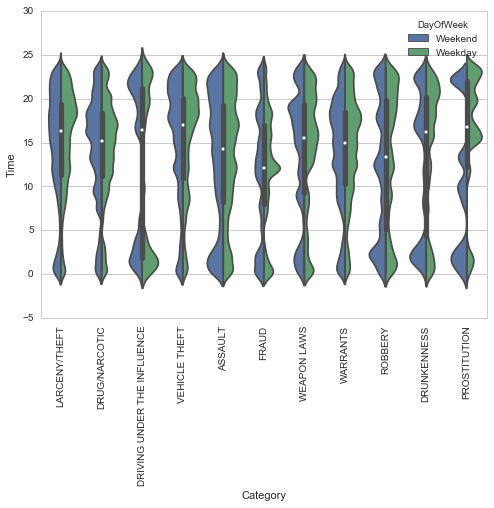

In [36]:
g=sns.violinplot(x="Category", y="Time",hue="DayOfWeek",bw=.1,data=sf_robbery,split=True)

for item in g.get_xticklabels():
    item.set_rotation(90)

Q: What are some differences between crimes happening on weekends and weekdays in terms of time of day?
A: On weekdays, there appears to be a spike in fraud incidents during the lunch hour. Also, prostitution incidents seem more likely later at night on weekends; on weekdays there are spikes from late afternoon on.